In [125]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'categorial.csv'
data = pd.read_csv(file_path)
columns_to_drop = ['Sl. No.']
data.drop(columns=columns_to_drop, inplace=True)

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

target_columns = ['Loss in Transport (%)', 'Loss in Storage (%)',
                       'Overall Total Loss (%) - (Farm operation + transport + storage)',
                        'Number', 'Capacity (MT)',
                       'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
                       'Quality of Multi-Modal Terminal Infrastructure',
                       'Quality of Unimodal Terminal Infrastructure',
                       'Reasonableness of Prices of Terminal Services']
predictive_features = ['Crop','Loss in Transport (%)', 'Loss in Storage (%)',
                       'Overall Total Loss (%) - (Farm operation + transport + storage)',
                        'State_Name', 'District_Name','Number', 'Capacity (MT)',
                       'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
                       'Quality of Multi-Modal Terminal Infrastructure',
                       'Quality of Unimodal Terminal Infrastructure',
                       'Reasonableness of Prices of Terminal Services']



models = {}

for target_column in target_columns:
    if target_column not in predictive_features:
        continue 

    print(f'Processing target: {target_column}')
    
    X = data_imputed[predictive_features]  
    y = data_imputed[target_column]  

    if y.dtype == 'object':
        y = pd.to_numeric(y, errors='coerce')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error for {target_column}: {mse:.2f}')
    print(f'R^2 Score for {target_column}: {r2:.2f}')
    print('-' * 40)
    
    models[target_column] = {
        'model': model,
        'feature_names': predictive_features
    }

def preprocess_input(input_dict, feature_names, imputer, label_encoders):
    input_df = pd.DataFrame([input_dict])
    
    for col in feature_names:
        if col not in input_df.columns:
            print(f"Adding missing column: {col}")
            input_df[col] = 0  

    input_df = input_df[feature_names]
    
    input_df = pd.DataFrame(imputer.transform(input_df), columns=feature_names)
    
    for column, le in label_encoders.items():
        if column in input_df.columns:
            input_df[column] = le.transform(input_df[column])
    
    return input_df

def predict_multiple(input_dict, models, imputer, label_encoders):
    predictions = {}
    for target, model_info in models.items():
        feature_names = model_info['feature_names']
        model = model_info['model']
        processed_input = preprocess_input(input_dict, feature_names, imputer, label_encoders)
        print(f"Processed input for {target}:")
        print(processed_input)
        prediction = model.predict(processed_input)
        predictions[target] = prediction[0]
    return predictions

input_dict = {
    'Loss in Transport (%)': 0.0108695652173912,
    'Loss in Storage (%)': 0.1621621621621622,
    'Overall Total Loss (%) - (Farm operation + transport + storage)': 0.2489130434782608,
    'Number': 0.0429141716566866,
    'Capacity (MT)': 0.0545249183670717,
    'Quality of Road Infrastructure': 0.3500000000000001,
    'Quality of Rail Infrastructure': 0.5,
    'Quality of Multi-Modal Terminal Infrastructure': 0.4,
    'Quality of Unimodal Terminal Infrastructure': 0.2941176470588235,
    'Reasonableness of Prices of Terminal Services': 2.2,
    'Crop': 9,
    'State_Name': 0,
    'District_Name': 16
}

predictions = predict_multiple(input_dict, models, imputer, label_encoders)
print('Predictions:')
for target, pred in predictions.items():
    print(f'{target}: {pred}')
   

Processing target: Loss in Transport (%)
Mean Squared Error for Loss in Transport (%): 0.00
R^2 Score for Loss in Transport (%): 1.00
----------------------------------------
Processing target: Loss in Storage (%)
Mean Squared Error for Loss in Storage (%): 0.00
R^2 Score for Loss in Storage (%): 1.00
----------------------------------------
Processing target: Overall Total Loss (%) - (Farm operation + transport + storage)
Mean Squared Error for Overall Total Loss (%) - (Farm operation + transport + storage): 0.00
R^2 Score for Overall Total Loss (%) - (Farm operation + transport + storage): 1.00
----------------------------------------
Processing target: Number
Mean Squared Error for Number: 0.00
R^2 Score for Number: 1.00
----------------------------------------
Processing target: Capacity (MT)
Mean Squared Error for Capacity (MT): 0.00
R^2 Score for Capacity (MT): 1.00
----------------------------------------
Processing target: Quality of Road Infrastructure
Mean Squared Error for Q

Processing target: Loss in Transport (%)
Mean Squared Error for Loss in Transport (%): 0.00
R^2 Score for Loss in Transport (%): 1.00
----------------------------------------
Processing target: Loss in Storage (%)
Mean Squared Error for Loss in Storage (%): 0.00
R^2 Score for Loss in Storage (%): 1.00
----------------------------------------
Processing target: Overall Total Loss (%) - (Farm operation + transport + storage)
Mean Squared Error for Overall Total Loss (%) - (Farm operation + transport + storage): 0.00
R^2 Score for Overall Total Loss (%) - (Farm operation + transport + storage): 1.00
----------------------------------------
Processing target: Number
Mean Squared Error for Number: 0.00
R^2 Score for Number: 1.00
----------------------------------------
Processing target: Capacity (MT)
Mean Squared Error for Capacity (MT): 0.00
R^2 Score for Capacity (MT): 1.00
----------------------------------------
Processing target: Quality of Road Infrastructure
Mean Squared Error for Q

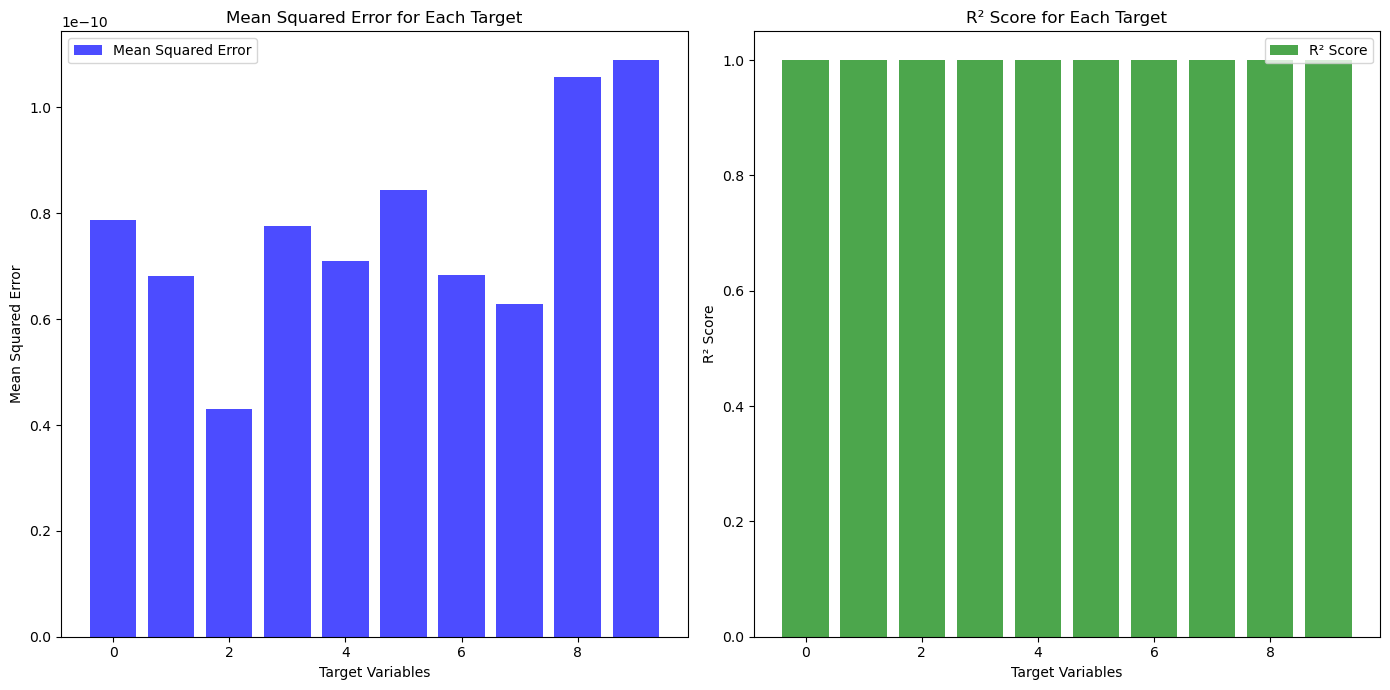

In [126]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


file_path = 'categorial.csv'
data = pd.read_csv(file_path)
columns_to_drop = ['Sl. No.']
data.drop(columns=columns_to_drop, inplace=True)


imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

predictive_features = ['Crop', 'Loss in Transport (%)', 'Loss in Storage (%)',
                       'Overall Total Loss (%) - (Farm operation + transport + storage)',
                       'State_Name', 'District_Name', 'Number', 'Capacity (MT)',
                       'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
                       'Quality of Multi-Modal Terminal Infrastructure',
                       'Quality of Unimodal Terminal Infrastructure',
                       'Reasonableness of Prices of Terminal Services']

target_columns = ['Loss in Transport (%)', 'Loss in Storage (%)',
                   'Overall Total Loss (%) - (Farm operation + transport + storage)',
                   'Number', 'Capacity (MT)',
                   'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
                   'Quality of Multi-Modal Terminal Infrastructure',
                   'Quality of Unimodal Terminal Infrastructure',
                   'Reasonableness of Prices of Terminal Services']

models = {}
mse_scores = {}
r2_scores = {}

for target_column in target_columns:
    if target_column not in predictive_features:
        continue  

    print(f'Processing target: {target_column}')
    
    X = data_imputed[predictive_features]  
    y = data_imputed[target_column]  

    if y.dtype == 'object':
        y = pd.to_numeric(y, errors='coerce')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error for {target_column}: {mse:.2f}')
    print(f'R^2 Score for {target_column}: {r2:.2f}')
    print('-' * 40)
    
    models[target_column] = {
        'model': model,
        'feature_names': predictive_features,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred
    }
    mse_scores[target_column] = mse
    r2_scores[target_column] = r2

def plot_metrics(mse_scores, r2_scores):
    targets = list(mse_scores.keys())
    mse_values = [mse_scores[target] for target in targets]
    r2_values = [r2_scores[target] for target in targets]
    
    x = range(len(targets))
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    plt.bar(x, mse_values, color='blue', alpha=0.7, label='Mean Squared Error')
    plt.xlabel('Target Variables')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error for Each Target')
    plt.savefig('GBMSE.png', format='png')  # Save as PNG


    plt.legend()  
    
    plt.subplot(1, 2, 2)
    plt.bar(x, r2_values, color='green', alpha=0.7, label='R² Score')
    plt.xlabel('Target Variables')
    plt.ylabel('R² Score')
    plt.title('R² Score for Each Target')
    plt.savefig('GBR.png', format='png')  

    plt.legend()  
    
    plt.tight_layout()
    plt.show()

plot_metrics(mse_scores, r2_scores)









In [111]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)  

model_params = model.get_params()
params_df = pd.DataFrame(list(model_params.items()), columns=['Parameter', 'Value'])
params_df.to_csv('GBmodel_parameters.csv', index=False)

y_pred = model.predict(X_test)  
predictions_df = pd.DataFrame(y_pred, columns=['Predicted Values'])
predictions_df.to_csv('GBmodel_predictions.csv', index=False)


In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

file_path = 'categorial.csv'
data = pd.read_csv(file_path)

print("Available columns in the DataFrame:")
print(data.columns)

target_columns = [
    'Overall Total Loss (%) - (Farm operation + transport + storage)', 
    'Loss in Transport (%)', 
    'Loss in Storage (%)',
    'Number', 'Capacity (MT)',
    'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
    'Quality of Multi-Modal Terminal Infrastructure',
    'Quality of Unimodal Terminal Infrastructure',
    'Reasonableness of Prices of Terminal Services'
]

missing_targets = [col for col in target_columns if col not in data.columns]
if missing_targets:
    raise KeyError(f"Columns missing in DataFrame: {missing_targets}")

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

X = data_imputed.drop(columns=target_columns)
y = data_imputed[target_columns]

if X.shape[0] != y.shape[0]:
    raise ValueError(f"Mismatch in number of samples: X has {X.shape[0]} and y has {y.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

with open('knn_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

with open('knn_regressor_model.pkl', 'rb') as model_file:
    knn_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('label_encoders.pkl', 'rb') as le_file:
    label_encoders = pickle.load(le_file)

y_pred = knn_model.predict(X_test_scaled)

for i, target_column in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'Mean Squared Error for {target_column}: {mse:.2f}')
    print(f'R^2 Score for {target_column}: {r2:.2f}')
    print('-' * 40)

    

input_data = {
    'Loss in Transport (%)': [0.0108695652173912],
    'Loss in Storage (%)': [0.1621621621621622],
    'Overall Total Loss (%) - (Farm operation + transport + storage)': [0.2489130434782608],
    'Number': [0.0429141716566866],
    'Capacity (MT)': [0.0545249183670717],
    'Quality of Road Infrastructure': [0.3500000000000001],
    'Quality of Rail Infrastructure': [0.5],
    'Quality of Multi-Modal Terminal Infrastructure': [0.4],
    'Quality of Unimodal Terminal Infrastructure': [0.2941176470588235],
    'Reasonableness of Prices of Terminal Services': [2.2],
    'Crop': [9],
    'State_Name': [0],
    'District_Name': [16]
}

input_df = pd.DataFrame(input_data)

input_df = input_df.drop(columns=['Sl. No.'], errors='ignore')

for column, le in label_encoders.items():
    if column in input_df.columns:
        input_df[column] = le.transform(input_df[column])

input_df = input_df.reindex(columns=X.columns, fill_value=0)

input_scaled = scaler.transform(input_df)

prediction = knn_model.predict(input_scaled)

print('Predictions for input data:')
for i, target_column in enumerate(target_columns):
    print(f'{target_column}: {prediction[0][i]}')


Available columns in the DataFrame:
Index(['Sl. No.', 'Crop', 'Loss in Transport (%)', 'Loss in Storage (%)',
       'Overall Total Loss (%) - (Farm operation + transport + storage)',
       'State_Name', 'District_Name', 'Number', 'Capacity (MT)',
       'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
       'Quality of Multi-Modal Terminal Infrastructure',
       'Quality of Unimodal Terminal Infrastructure',
       'Reasonableness of Prices of Terminal Services'],
      dtype='object')
Mean Squared Error for Overall Total Loss (%) - (Farm operation + transport + storage): 0.01
R^2 Score for Overall Total Loss (%) - (Farm operation + transport + storage): 0.78
----------------------------------------
Mean Squared Error for Loss in Transport (%): 0.01
R^2 Score for Loss in Transport (%): 0.94
----------------------------------------
Mean Squared Error for Loss in Storage (%): 0.01
R^2 Score for Loss in Storage (%): 0.89
----------------------------------------
Mean

In [52]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

file_path = 'categorial.csv'
data = pd.read_csv(file_path)

print("Available columns in the DataFrame:")
print(data.columns)

target_columns = [
    'Overall Total Loss (%) - (Farm operation + transport + storage)', 
    'Loss in Transport (%)', 
    'Loss in Storage (%)',
    'Number', 'Capacity (MT)',
    'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
    'Quality of Multi-Modal Terminal Infrastructure',
    'Quality of Unimodal Terminal Infrastructure',
    'Reasonableness of Prices of Terminal Services'
]

missing_targets = [col for col in target_columns if col not in data.columns]
if missing_targets:
    raise KeyError(f"Columns missing in DataFrame: {missing_targets}")

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

X = data_imputed.drop(columns=target_columns)
y = data_imputed[target_columns]

if X.shape[0] != y.shape[0]:
    raise ValueError(f"Mismatch in number of samples: X has {X.shape[0]} and y has {y.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

with open('knn_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

with open('knn_regressor_model.pkl', 'rb') as model_file:
    knn_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('label_encoders.pkl', 'rb') as le_file:
    label_encoders = pickle.load(le_file)

y_pred = knn_model.predict(X_test_scaled)

for i, target_column in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'Mean Squared Error for {target_column}: {mse:.2f}')
    print(f'R^2 Score for {target_column}: {r2:.2f}')
    print('-' * 40)

    

input_data = {
    'Loss in Transport (%)': [0.0108695652173912],
    'Loss in Storage (%)': [0.1621621621621622],
    'Overall Total Loss (%) - (Farm operation + transport + storage)': [0.2489130434782608],
    'Number': [0.0429141716566866],
    'Capacity (MT)': [0.0545249183670717],
    'Quality of Road Infrastructure': [0.3500000000000001],
    'Quality of Rail Infrastructure': [0.5],
    'Quality of Multi-Modal Terminal Infrastructure': [0.4],
    'Quality of Unimodal Terminal Infrastructure': [0.2941176470588235],
    'Reasonableness of Prices of Terminal Services': [2.2],
    'Crop': [9],
    'State_Name': [0],
    'District_Name': [16]
}

input_df = pd.DataFrame(input_data)

input_df = input_df.drop(columns=['Sl. No.'], errors='ignore')

for column, le in label_encoders.items():
    if column in input_df.columns:
        input_df[column] = le.transform(input_df[column])

input_df = input_df.reindex(columns=X.columns, fill_value=0)

input_scaled = scaler.transform(input_df)

prediction = knn_model.predict(input_scaled)

print('Predictions for input data:')
for i, target_column in enumerate(target_columns):
    print(f'{target_column}: {prediction[0][i]}')


Available columns in the DataFrame:
Index(['Sl. No.', 'Crop', 'Loss in Transport (%)', 'Loss in Storage (%)',
       'Overall Total Loss (%) - (Farm operation + transport + storage)',
       'State_Name', 'District_Name', 'Number', 'Capacity (MT)',
       'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
       'Quality of Multi-Modal Terminal Infrastructure',
       'Quality of Unimodal Terminal Infrastructure',
       'Reasonableness of Prices of Terminal Services'],
      dtype='object')
Mean Squared Error for Overall Total Loss (%) - (Farm operation + transport + storage): 0.01
R^2 Score for Overall Total Loss (%) - (Farm operation + transport + storage): 0.78
----------------------------------------
Mean Squared Error for Loss in Transport (%): 0.01
R^2 Score for Loss in Transport (%): 0.94
----------------------------------------
Mean Squared Error for Loss in Storage (%): 0.01
R^2 Score for Loss in Storage (%): 0.89
----------------------------------------
Mean

Available columns in the DataFrame:
Index(['Sl. No.', 'Crop', 'Loss in Transport (%)', 'Loss in Storage (%)',
       'Overall Total Loss (%) - (Farm operation + transport + storage)',
       'State_Name', 'District_Name', 'Number', 'Capacity (MT)',
       'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
       'Quality of Multi-Modal Terminal Infrastructure',
       'Quality of Unimodal Terminal Infrastructure',
       'Reasonableness of Prices of Terminal Services'],
      dtype='object')
Mean Squared Error for Overall Total Loss (%) - (Farm operation + transport + storage): 0.01
R^2 Score for Overall Total Loss (%) - (Farm operation + transport + storage): 0.78
----------------------------------------
Mean Squared Error for Loss in Transport (%): 0.01
R^2 Score for Loss in Transport (%): 0.94
----------------------------------------
Mean Squared Error for Loss in Storage (%): 0.01
R^2 Score for Loss in Storage (%): 0.89
----------------------------------------
Mean

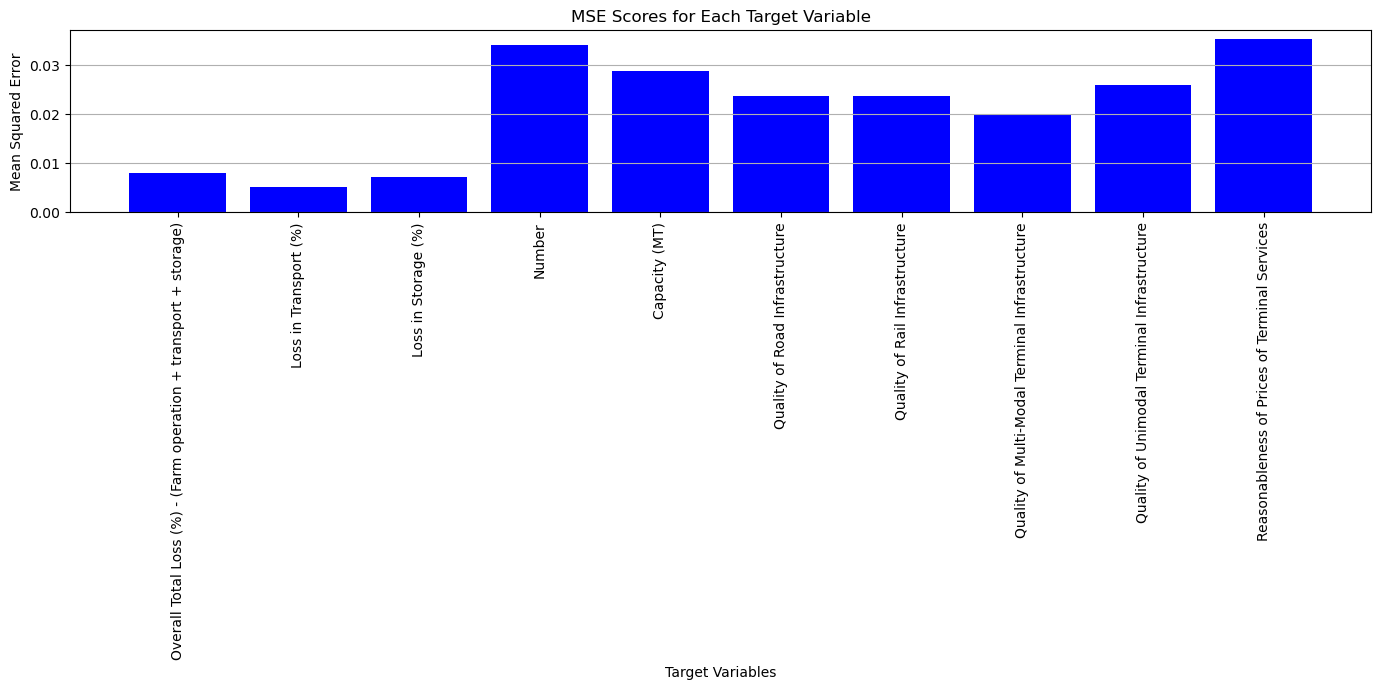

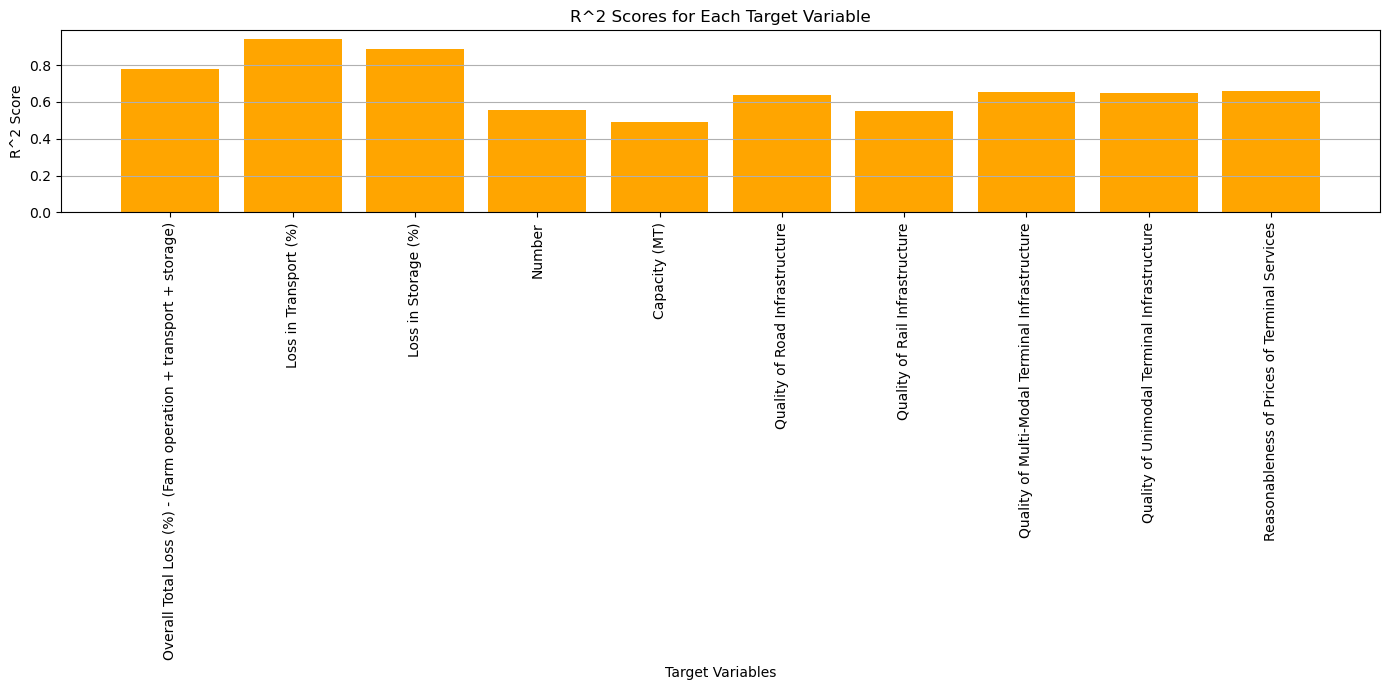

NameError: name 'df_cleaned' is not defined

In [98]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle


file_path = 'categorial.csv'
data = pd.read_csv(file_path)

print("Available columns in the DataFrame:")
print(data.columns)

target_columns = [
    'Overall Total Loss (%) - (Farm operation + transport + storage)', 
    'Loss in Transport (%)', 
    'Loss in Storage (%)',
    'Number', 'Capacity (MT)',
    'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
    'Quality of Multi-Modal Terminal Infrastructure',
    'Quality of Unimodal Terminal Infrastructure',
    'Reasonableness of Prices of Terminal Services'
]

missing_targets = [col for col in target_columns if col not in data.columns]
if missing_targets:
    raise KeyError(f"Columns missing in DataFrame: {missing_targets}")

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

X = data_imputed.drop(columns=target_columns)
y = data_imputed[target_columns]

if X.shape[0] != y.shape[0]:
    raise ValueError(f"Mismatch in number of samples: X has {X.shape[0]} and y has {y.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

mse_scores = []
r2_scores = []

for i, target_column in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f'Mean Squared Error for {target_column}: {mse:.2f}')
    print(f'R^2 Score for {target_column}: {r2:.2f}')
    print('-' * 40)

plt.figure(figsize=(14, 7))
plt.bar(target_columns, mse_scores, color='blue')
plt.xlabel('Target Variables')
plt.ylabel('Mean Squared Error')
plt.title('MSE Scores for Each Target Variable')
plt.savefig('knnMSE.png', format='png')  # Save as PNG

plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.bar(target_columns, r2_scores, color='orange')
plt.xlabel('Target Variables')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores for Each Target Variable')
plt.savefig('KnnR_matrix.png', format='png')  # Save as PNG

plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

with open('knn_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)
    df_cleaned.to_csv('cleaned_data.csv', index=False)



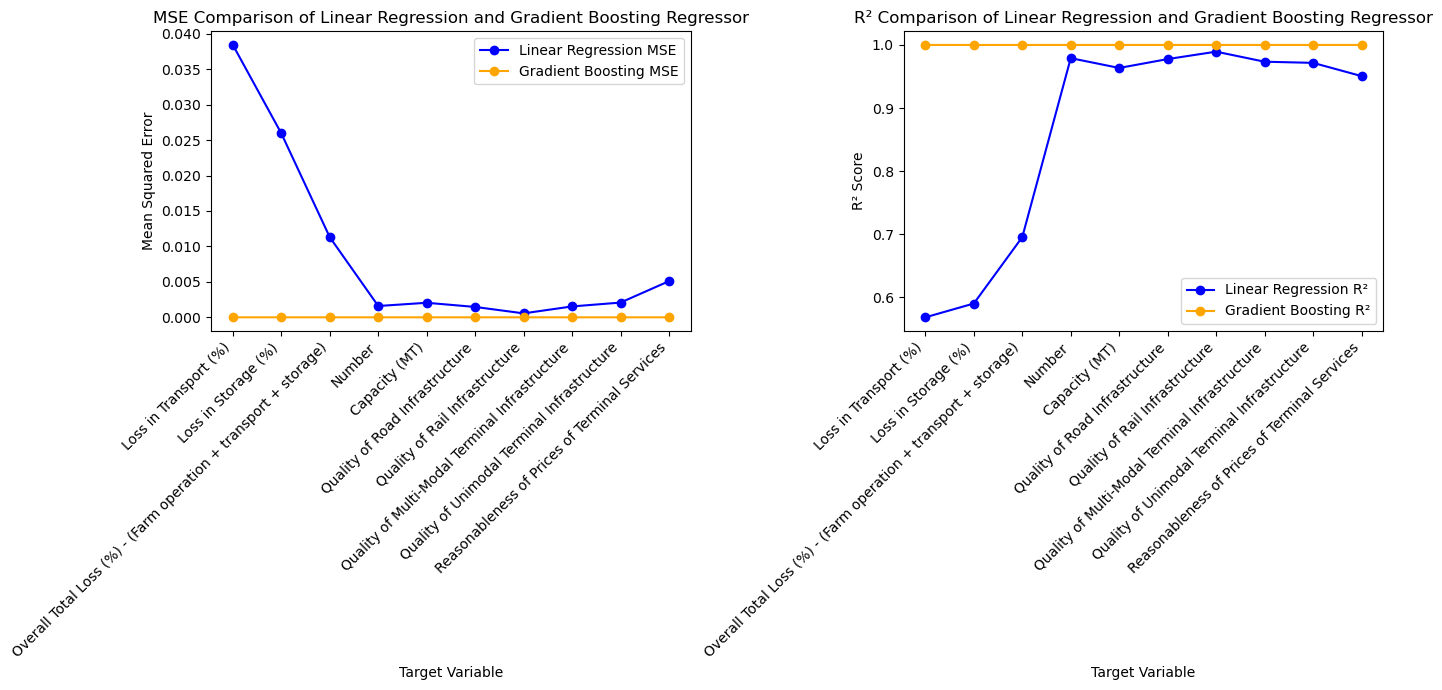

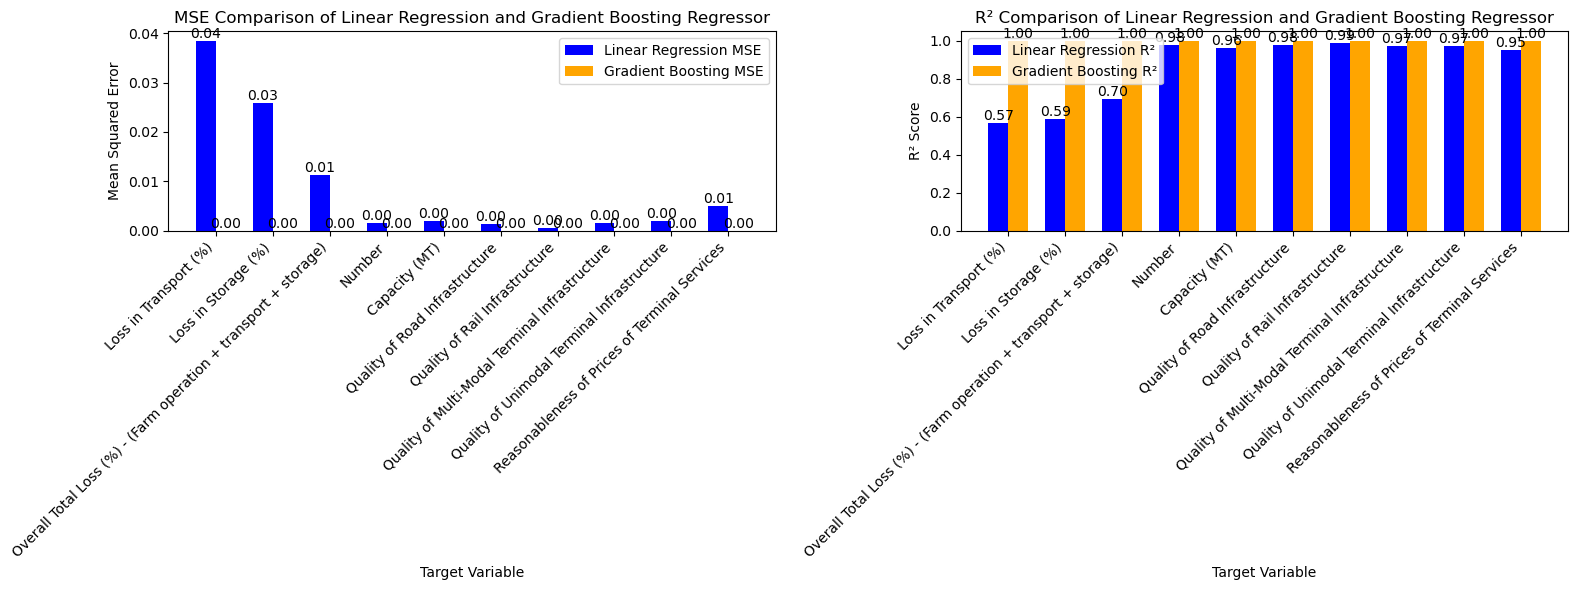

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



file_path = 'categorial.csv'
data = pd.read_csv(file_path)
columns_to_drop = ['Sl. No.']
data.drop(columns=columns_to_drop, inplace=True)

target_columns = ['Loss in Transport (%)', 
                  'Loss in Storage (%)', 'Overall Total Loss (%) - (Farm operation + transport + storage)', 'Number', 'Capacity (MT)',
                 'Quality of Road Infrastructure', 'Quality of Rail Infrastructure',
                   'Quality of Multi-Modal Terminal Infrastructure',
                   'Quality of Unimodal Terminal Infrastructure',
                   'Reasonableness of Prices of Terminal Services']

mse_scores_lr = []
mse_scores_gbr = []
r2_scores_lr = []
r2_scores_gbr = []
targets = []

for target_column in target_columns:
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    mse_scores_lr.append(mse_lr)
    r2_scores_lr.append(r2_lr)

    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train, y_train)
    y_pred_gbr = gbr.predict(X_test)

    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)
    mse_scores_gbr.append(mse_gbr)
    r2_scores_gbr.append(r2_gbr)
    
    targets.append(target_column)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(targets, mse_scores_lr, marker='o', label='Linear Regression MSE', color='blue')
plt.plot(targets, mse_scores_gbr, marker='o', label='Gradient Boosting MSE', color='orange')
plt.xlabel('Target Variable')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Linear Regression and Gradient Boosting Regressor')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.plot(targets, r2_scores_lr, marker='o', label='Linear Regression R²', color='blue')
plt.plot(targets, r2_scores_gbr, marker='o', label='Gradient Boosting R²', color='orange')
plt.xlabel('Target Variable')
plt.ylabel('R² Score')
plt.title('R² Comparison of Linear Regression and Gradient Boosting Regressor')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



mse_scores_lr = []
mse_scores_gbr = []
r2_scores_lr = []
r2_scores_gbr = []
targets = []

for target_column in target_columns:
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    mse_scores_lr.append(mse_lr)
    r2_scores_lr.append(r2_lr)

    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train, y_train)
    y_pred_gbr = gbr.predict(X_test)

    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)
    mse_scores_gbr.append(mse_gbr)
    r2_scores_gbr.append(r2_gbr)
    
    targets.append(target_column)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

width = 0.35  
x = np.arange(len(targets))  

rects1 = ax1.bar(x - width/2, mse_scores_lr, width, label='Linear Regression MSE', color='blue')
rects2 = ax1.bar(x + width/2, mse_scores_gbr, width, label='Gradient Boosting MSE', color='orange')

ax1.set_xlabel('Target Variable')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Comparison of Linear Regression and Gradient Boosting Regressor')
plt.savefig('GBRCKNNMSE_matrix.png', format='png')  # Save as PNG
ax1.set_xticks(x)
ax1.set_xticklabels(targets, rotation=45, ha='right')
ax1.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

rects3 = ax2.bar(x - width/2, r2_scores_lr, width, label='Linear Regression R²', color='blue')
rects4 = ax2.bar(x + width/2, r2_scores_gbr, width, label='Gradient Boosting R²', color='orange')

ax2.set_xlabel('Target Variable')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Comparison of Linear Regression and Gradient Boosting Regressor')
plt.savefig('GBRCKNNR.png', format='png')  # Save as PNG

ax2.set_xticks(x)
ax2.set_xticklabels(targets, rotation=45, ha='right')
ax2.legend()

for rect in rects3 + rects4:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [103]:
import pandas as pd

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

model_params = {
    'n_neighbors': knn_model.n_neighbors,
    'algorithm': knn_model.algorithm,
    'leaf_size': knn_model.leaf_size
}

params_df = pd.DataFrame(list(model_params.items()), columns=['Parameter', 'Value'])

params_df.to_csv('knn_model_parameters.csv', index=False)


In [83]:
import pandas as pd

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

y_pred = knn_model.predict(X_test)  # Ensure X_test is defined

predictions_df = pd.DataFrame(y_pred, columns=['Predicted Values'])

predictions_df.to_csv('knn_model_predictions.csv', index=False)


In [84]:
import pickle

with open('knn_model.pkl', 'wb') as knn_file:
    pickle.dump(knn_model, knn_file)

with open('gbr_model.pkl', 'wb') as gbr_file:
    pickle.dump(gbr_model, gbr_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

print("KNN model, Gradient Boosting model, scaler, and label encoders have been saved successfully.")


KNN model, Gradient Boosting model, scaler, and label encoders have been saved successfully.
